In [1]:
from gower.gower_dist import *

raw = pd.read_csv("Moonlanding.csv", index_col=1, encoding="latin1"
                  ).drop(columns="Additional Information")
raw

,Mission,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome
Spacecraft,,,,,,
Pioneer 0,Pioneer 0 (Able I),17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure
Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure
Pioneer 1,Pioneer 1 (Able II),11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure
Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure
Pioneer 2,Pioneer 2 (Able III),08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure
...,...,...,...,...,...,...
Rashid,Emirates Lunar Mission,11-Dec-22,Falcon 9 Block 5,UAE UAESA/MBRSC,Rover,Spacecraft failure
Lunar Flashlight,Lunar Flashlight,11-Dec-22,Falcon 9 Block 5,United States NASA,Flyby,Spacecraft failure
Jupiter Icy Moons Explorer,Jupiter Icy Moons Explorer,14-Apr-23,Ariane 5 ECA,European Union ESA,Flyby,En route


In [2]:
data = raw.copy()
mask = data["Launch Date"].str[-2:].astype(int) > 23
data.loc[mask, "Launch Date"] = data.loc[mask, "Launch Date"].str[:-2] + "19" + data.loc[mask, "Launch Date"].str[-2:]
data.loc[~mask, "Launch Date"] = data.loc[~mask, "Launch Date"].str[:-2] + "20" + data.loc[~mask, "Launch Date"].str[-2:]
data["Launch Date"] = pd.to_datetime(data["Launch Date"], format="%d-%b-%Y")
data["launch_date"] = (data["Launch Date"] - data["Launch Date"].min()) / np.timedelta64(1, "D")
data

,Mission,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,launch_date
Spacecraft,,,,,,,
Pioneer 0,Pioneer 0 (Able I),1958-08-17,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,0.0
Luna E-1 No.1,Luna E-1 No.1,1958-09-23,Luna,Soviet Union OKB-1,Impactor,Launch failure,37.0
Pioneer 1,Pioneer 1 (Able II),1958-10-11,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,55.0
Luna E-1 No.2,Luna E-1 No.2,1958-10-11,Luna,Soviet Union OKB-1,Impactor,Launch failure,55.0
Pioneer 2,Pioneer 2 (Able III),1958-11-08,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,83.0
...,...,...,...,...,...,...,...
Rashid,Emirates Lunar Mission,2022-12-11,Falcon 9 Block 5,UAE UAESA/MBRSC,Rover,Spacecraft failure,23492.0
Lunar Flashlight,Lunar Flashlight,2022-12-11,Falcon 9 Block 5,United States NASA,Flyby,Spacecraft failure,23492.0
Jupiter Icy Moons Explorer,Jupiter Icy Moons Explorer,2023-04-14,Ariane 5 ECA,European Union ESA,Flyby,En route,23616.0


  0%|          | 0/1 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [6.60441892]


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

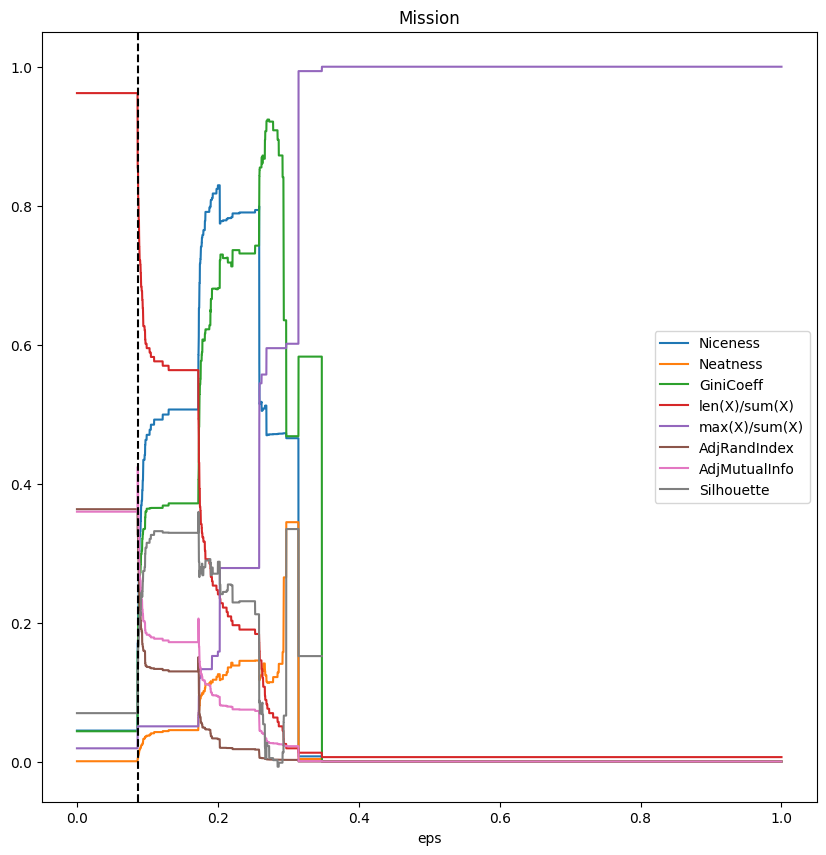

{'Silhouette': 0.13971830981554087, 'Niceness': 0.17013070584749287, 'Neatness': 0.004714871530280346, 'GiniCoeff': 0.15861217539378458, 'len(X)/sum(X)': 0.8544303797468354, 'max(X)/sum(X)': 0.05063291139240506, 'sample': {'eps': 0.0862, 'min_samples': 1}, 'counts_dict': {1: 120, 2: 12, 3: 2, 8: 1}, 'AdjRandIndex': 0.32664065158639466, 'AdjMutualInfo': 0.42414381994397204}


  0%|          | 0/1 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [6.60441892]


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

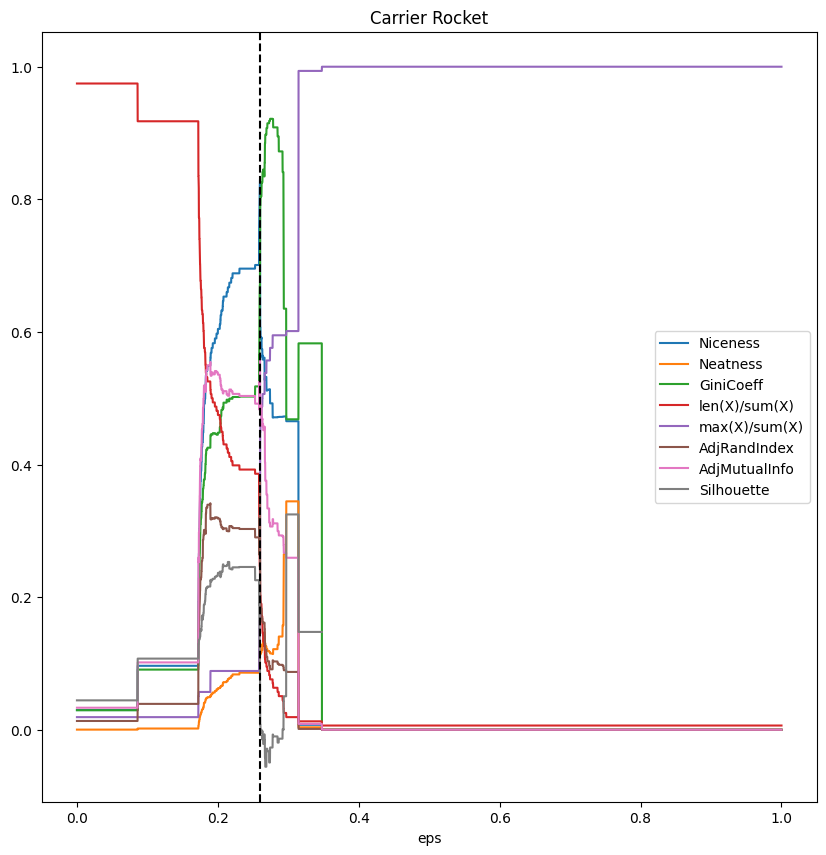

{'Silhouette': 0.08679668149370931, 'Niceness': 0.8299423242115597, 'Neatness': 0.12754015224573004, 'GiniCoeff': 0.7151067323481116, 'len(X)/sum(X)': 0.22151898734177214, 'max(X)/sum(X)': 0.17721518987341772, 'sample': {'eps': 0.2599, 'min_samples': 1}, 'counts_dict': {1: 15, 2: 8, 3: 2, 4: 5, 11: 1, 15: 1, 19: 1, 28: 2}, 'AdjRandIndex': 0.37413506295461463, 'AdjMutualInfo': 0.5577727469773357}


  0%|          | 0/1 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [6.60441892]


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

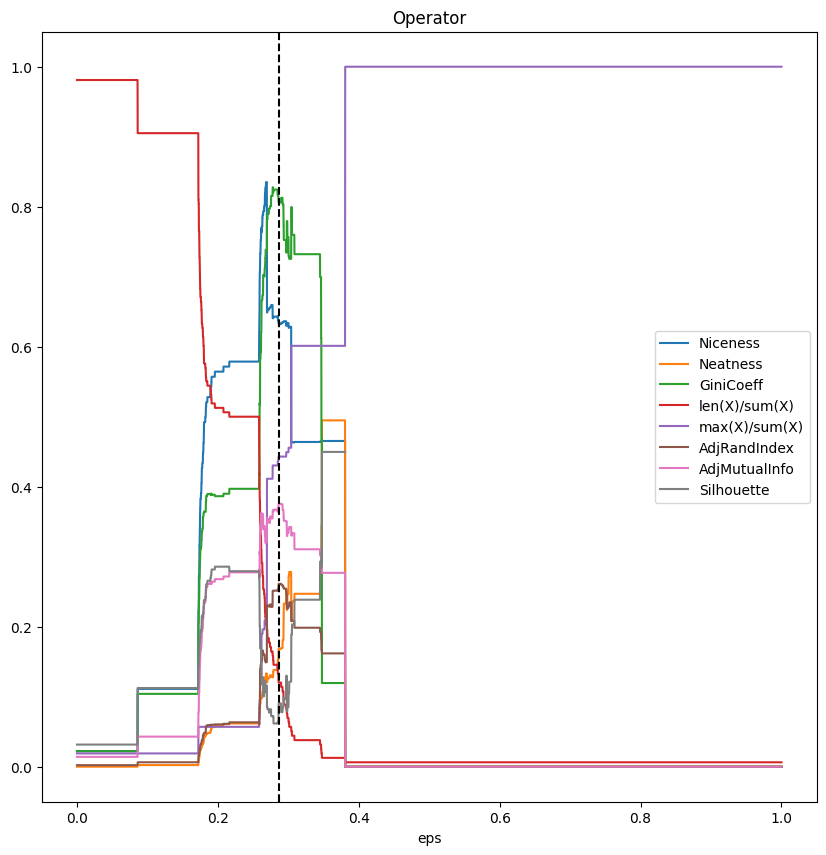

{'Silhouette': 0.0903313717556122, 'Niceness': 0.6324451002517143, 'Neatness': 0.1681194209312265, 'GiniCoeff': 0.8061101028433152, 'len(X)/sum(X)': 0.12025316455696203, 'max(X)/sum(X)': 0.4430379746835443, 'sample': {'eps': 0.2862, 'min_samples': 1}, 'counts_dict': {1: 8, 2: 2, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 16: 1, 17: 2, 70: 1}, 'AdjRandIndex': 0.2613027336178135, 'AdjMutualInfo': 0.37560612490607365}


  0%|          | 0/1 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [6.60441892]


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

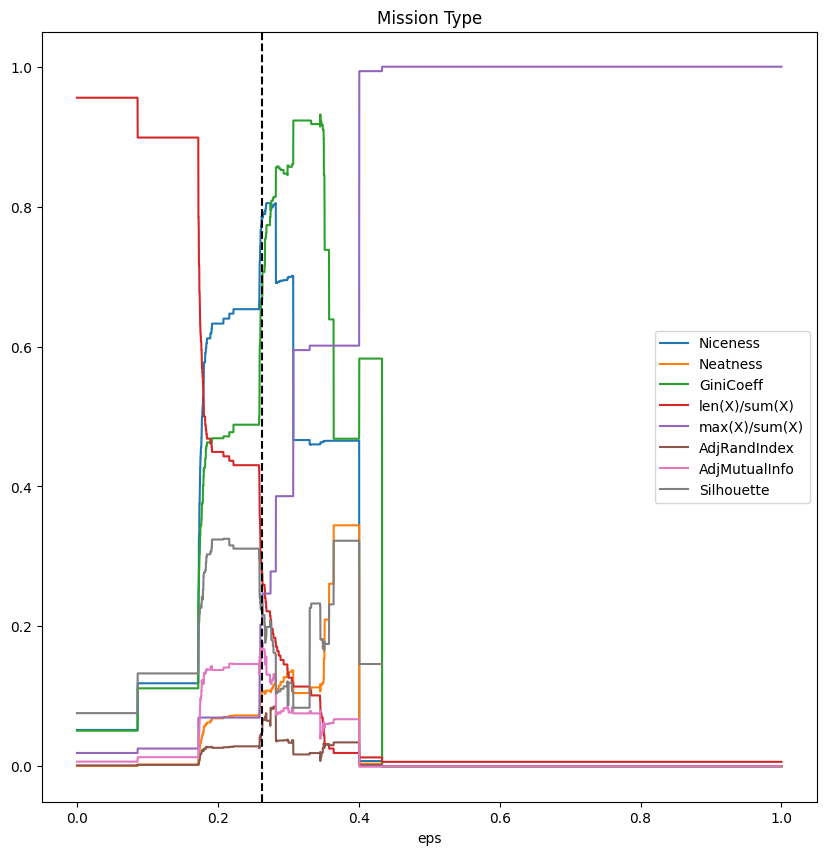

{'Silhouette': 0.22696821593297087, 'Niceness': 0.7831959031334086, 'Neatness': 0.10551019328463013, 'GiniCoeff': 0.6969622331691298, 'len(X)/sum(X)': 0.26582278481012656, 'max(X)/sum(X)': 0.2468354430379747, 'sample': {'eps': 0.2633, 'min_samples': 1}, 'counts_dict': {1: 21, 2: 7, 3: 6, 4: 3, 12: 1, 13: 1, 14: 1, 15: 1, 39: 1}, 'AdjRandIndex': 0.06868857024491795, 'AdjMutualInfo': 0.1765922544053423}


  0%|          | 0/1 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [6.60441892]


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

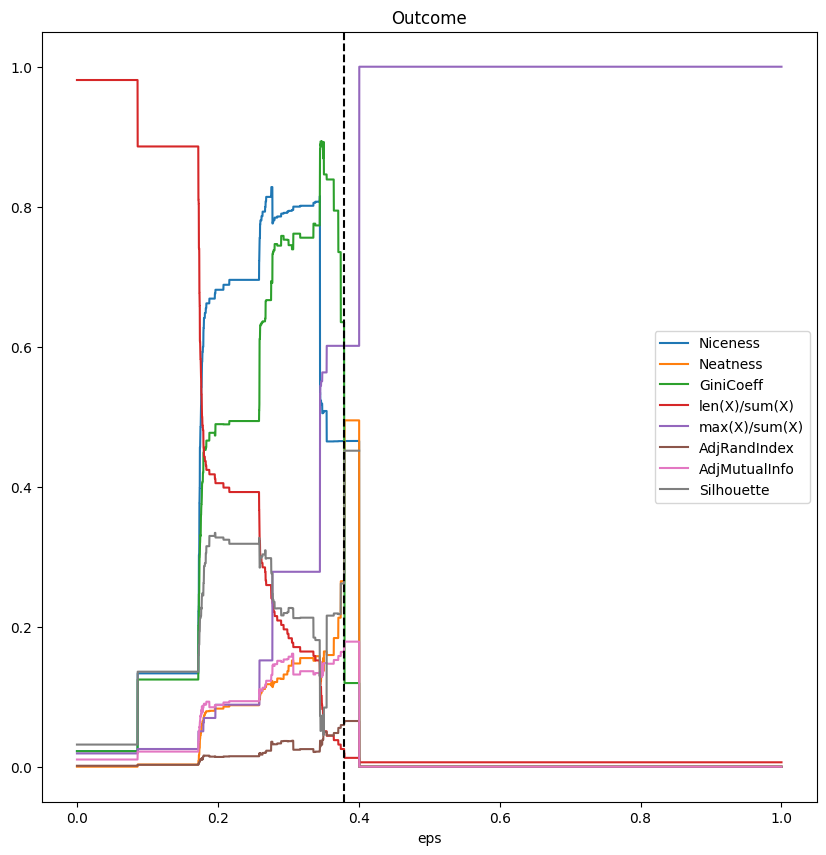

{'Silhouette': 0.45145018706922746, 'Niceness': 0.46536908613656025, 'Neatness': 0.49478831937161993, 'GiniCoeff': 0.11954022988505747, 'len(X)/sum(X)': 0.012658227848101266, 'max(X)/sum(X)': 0.6012658227848101, 'sample': {'eps': 0.3798, 'min_samples': 1}, 'counts_dict': {63: 1, 95: 1}, 'AdjRandIndex': 0.06529140029845205, 'AdjMutualInfo': 0.17867741479487267}


0it [00:00, ?it/s]

[1. 1. 1. 1. 1. 1.] []


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

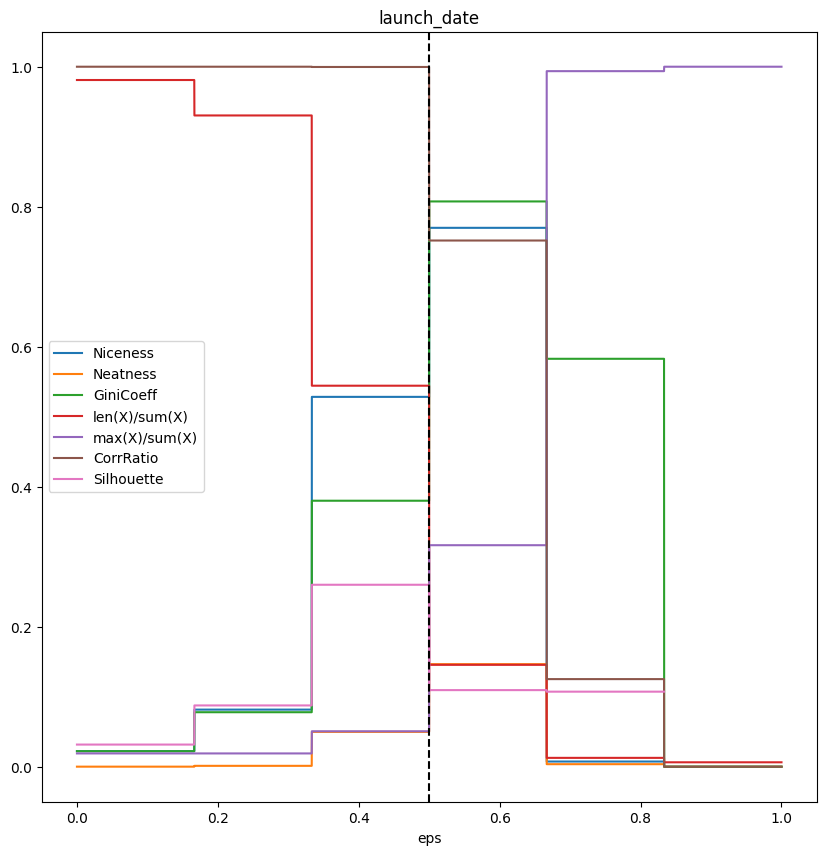

{'Silhouette': 0.10944518485755757, 'Niceness': 0.7698469661098624, 'Neatness': 0.14649331925016015, 'GiniCoeff': 0.8075462268865568, 'len(X)/sum(X)': 0.14556962025316456, 'max(X)/sum(X)': 0.31645569620253167, 'sample': {'eps': 0.5, 'min_samples': 1}, 'counts_dict': {1: 10, 2: 4, 3: 1, 4: 2, 7: 1, 8: 1, 9: 1, 11: 1, 44: 1, 50: 1}, 'CorrRatio': 0.7517182870136045}


,Mission,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,launch_date,cluster
Spacecraft,,,,,,,,
Pioneer 0,Pioneer 0 (Able I),1958-08-17,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,0.0,0
Luna E-1 No.1,Luna E-1 No.1,1958-09-23,Luna,Soviet Union OKB-1,Impactor,Launch failure,37.0,1
Pioneer 1,Pioneer 1 (Able II),1958-10-11,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,55.0,0
Luna E-1 No.2,Luna E-1 No.2,1958-10-11,Luna,Soviet Union OKB-1,Impactor,Launch failure,55.0,1
Pioneer 2,Pioneer 2 (Able III),1958-11-08,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,83.0,0
...,...,...,...,...,...,...,...,...
Rashid,Emirates Lunar Mission,2022-12-11,Falcon 9 Block 5,UAE UAESA/MBRSC,Rover,Spacecraft failure,23492.0,0
Lunar Flashlight,Lunar Flashlight,2022-12-11,Falcon 9 Block 5,United States NASA,Flyby,Spacecraft failure,23492.0,0
Jupiter Icy Moons Explorer,Jupiter Icy Moons Explorer,2023-04-14,Ariane 5 ECA,European Union ESA,Flyby,En route,23616.0,21


In [3]:
clusters = {}
results = 0
for column in data.drop("Launch Date", axis=1).columns:
    if data[column].dtype == object:
        df, (_, res) = optimize_dbscan(data.drop(columns=column), column, data[column],
                                       n_iter=10000, factor=1.0, precomputed=True, chunksize=20)
        results += res
    else:
        df, res = optimize_dbscan(data.drop(columns=column), column, data[column],
                                  n_iter=10000, factor=1.0, precomputed=True, chunksize=20)
    clusters[column] = df.cluster
results /= len(data.drop("Launch Date", axis=1).columns)
pd.concat([data, clusters["launch_date"]], axis=1)

In [4]:
results

,MutualInfo loss,RandIndex loss
Metric,,
"Max(K, L)",-0.077060,-0.081305
K + L,-0.080335,-0.078372
Niceness,-0.081376,-0.079076
Neatness,-0.151409,-0.133089
GiniCoeff,-0.138355,-0.126944
Silhouette,-0.108472,-0.109568
